<!--NAVIGATION-->
# < [Autograd](2_Autograd.ipynb) | Optimization | [Gradient Descent](4-Visualizing_Gradient_Descent.ipynb) >

# Some Operations on Images

## Notebook Introduction

In this short notebook, we will see how to read an image and apply Prewitt filter on it

(711, 716, 3)

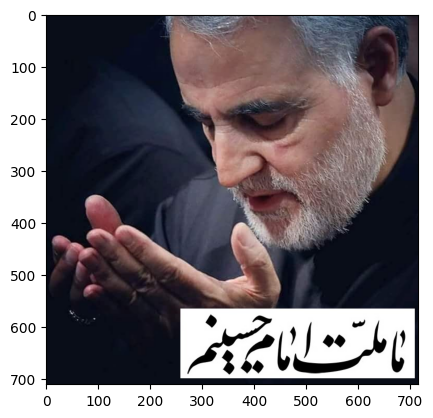

In [42]:
# %matplotlib notebook
from scipy import signal
from scipy import misc,ndimage
from skimage import color
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

img_url = "https://raw.githubusercontent.com/mamintoosi-cs/pytorch-workshop/master/data/Soleymani_mellat.jpg"
# img = color.rgb2gray(io.imread('data/Soleymani_mellat.jpg'))
response = requests.get(img_url) # this gets the image data from the URL
img = io.imread(BytesIO(response.content))
plt.imshow(img) 
img.shape

In [43]:
img = color.rgb2gray(img)
img.shape, img.min(), img.max()

((711, 716), 0.0, 1.0)

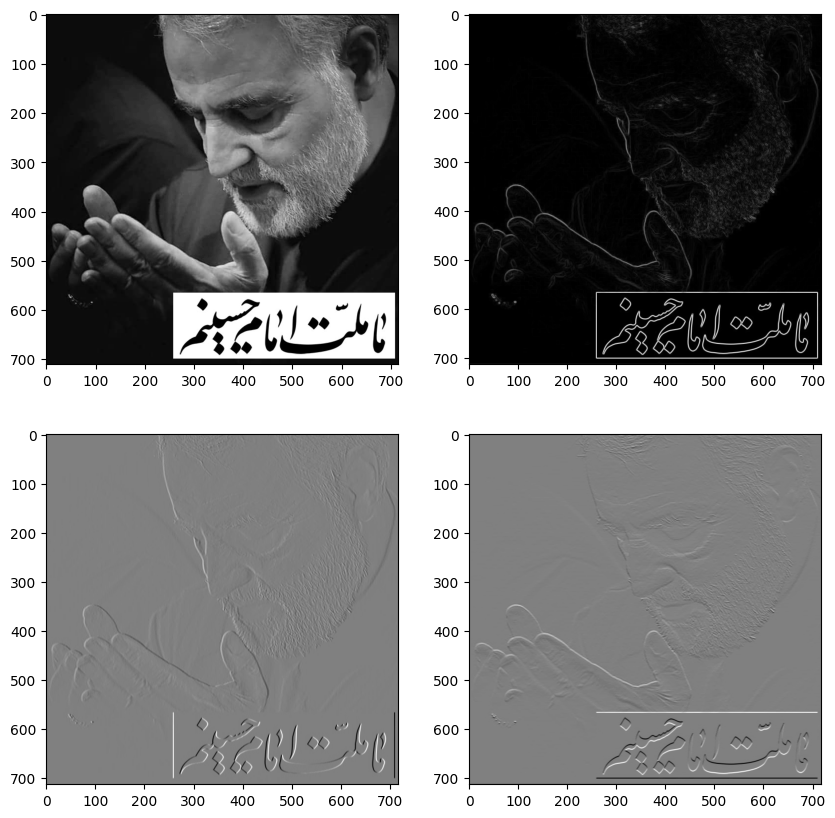

In [31]:
# kh = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = np.float)
# kv = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype = np.float)
kh = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype = np.float32)
kv = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = np.float32)
gx = signal.convolve2d(img, kh)
gy = signal.convolve2d(img, kv)

g = np.sqrt(gx * gx + gy * gy)
g = (g-g.min())/ (g.max()-g.min()) * 255.0 
# g *= 255.0 / g.max()

fig = plt.figure(figsize=(10,10))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # upper left side
ax2 = fig.add_subplot(222)  # upper right side
ax3 = fig.add_subplot(223)  # lower left side
ax4 = fig.add_subplot(224)  # lower right side
ax1.imshow(img)
ax2.imshow(g)
ax3.imshow(gx)
ax4.imshow(gy)
plt.show()

In [32]:
print(g.dtype, g.min(), g.max())
print(gx.dtype, gx.min(), gx.max())

float64 0.0 255.0
float64 -2.996078431372549 2.996078431372549


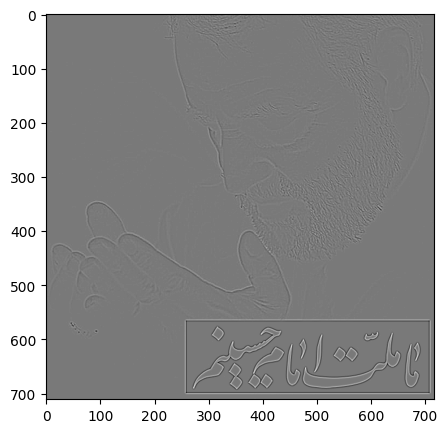

In [33]:
import cv2
import numpy as np

# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)

# Apply Laplacian operator in some higher datatype
laplacian_cv2 = cv2.Laplacian(blur,cv2.CV_64F)
g = laplacian_cv2
laplacian_cv2 = (g-g.min())/ (g.max()-g.min())# * 255.0 

f = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype = np.float32)
L = signal.convolve2d(img, f)

g = L
g = (g-g.min())/ (g.max()-g.min())# * 255.0 
# g *= 255.0 / g.max()

fig = plt.figure(figsize=(5,5))
plt.gray()  # show the filtered result in grayscale
# ax1 = fig.add_subplot(221)  # upper left side
# ax2 = fig.add_subplot(222)  # upper right side
# ax3 = fig.add_subplot(223)  # lower left side
ax4 = fig.add_subplot(111)  # lower right side
# ax1.imshow(img)
# ax2.imshow(g)
# ax3.imshow(laplacian_cv2)
ax4.imshow(laplacian_cv2)
plt.show()
# print(type(g), type(laplacian_cv2))

___

## Some other operations on images using scipy

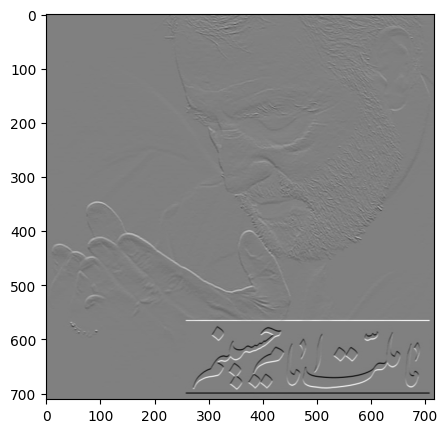

In [34]:
edge_im = ndimage.prewitt(img, axis=0)
fig = plt.figure(figsize=(5,5))
plt.imshow(edge_im)
plt.show()

C:\Users\m.amintoosi\AppData\Local\Temp\ipykernel_8196\1901358861.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face()


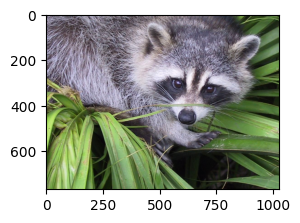

In [39]:
from scipy import misc
f = misc.face()
fig = plt.figure(figsize=(3,3))
plt.imshow(f)
plt.show()

C:\Users\m.amintoosi\AppData\Local\Temp\ipykernel_8196\3977155553.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face()


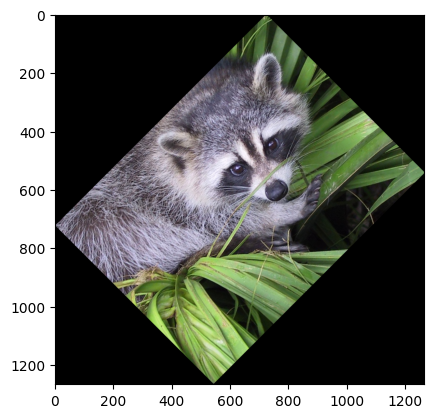

In [36]:
# rotation
from scipy import misc,ndimage
face = misc.face()
rotate_face = ndimage.rotate(face, 45)
plt.imshow(rotate_face)
plt.show()

C:\Users\m.amintoosi\AppData\Local\Temp\ipykernel_8196\1858031628.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray = True)


((768, 1024), numpy.uint8, dtype('uint8'))

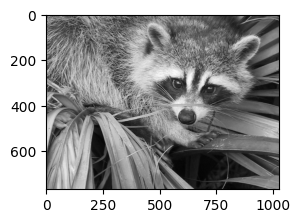

In [40]:
face = misc.face(gray = True)
fig = plt.figure(figsize=(3,3))
plt.imshow(face, cmap='gray')
face.shape, type(face[0,0]), face.dtype